In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
df_data=pd.read_csv('data_twente_wrist.csv')
df_data.shape
#The 17 columns are: 1: Ts + 3 x 4 (sensors)+ 2x (u_id,act_id) (Numerical and categorical)

(630000, 17)

# Benchmark with just the raw images

## Why 630k you ask?

Its 10 users x 7 activities x 180 seconds x 50 Hz

In [150]:
col_sensors=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz']
X_train_test=df_data.ix[:,col_sensors].as_matrix().reshape(12600, 1, 50,12)
X_train_test.shape

(12600L, 1L, 50L, 12L)

At the seconds level: 630*1e3/50 = 12600.0 'samples'

In [151]:
y_train_test=df_data.ix[:,'act_codes'].as_matrix().reshape(12600, 1, 50,1)
y_train_test.shape

(12600L, 1L, 50L, 1L)

In [152]:
N_train=12600.0*0.8 # 70% train and 30% test
X_train=X_train_test[0:N_train,:,:,:]
X_test=X_train_test[N_train:,:,:,:]
print(X_train.shape)
print(X_test.shape)

y_train=y_train_test[0:N_train,0,0,0]
print(np.bincount(y_train))

y_test=y_train_test[N_train:,0,0,0]
print(np.bincount(y_test))

nb_classes=7

from keras.utils import np_utils
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(10080L, 1L, 50L, 12L)
(2520L, 1L, 50L, 12L)
[1440 1440 1440 1440 1440 1440 1440]
[360 360 360 360 360 360 360]


C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [153]:
print(Y_train.shape)
print(Y_test.shape)

(10080L, 7L)
(2520L, 7L)


In [154]:
X_train/=X_train.max()
X_test/=X_test.max()


In [155]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D , AveragePooling2D
from keras.utils import np_utils

# Training code
```python

model = mnist_cnn_keras()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128,validation_split=0.125, nb_epoch=20,verbose=0)
model.save("mnist_cnn_keras.h5")
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
```

# Reproducability: Load the pre-trained model

In [158]:
# Refrom keras.models import load_model
model = load_model('mnist_cnn_keras.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.195054876165
Test accuracy: 0.942857142668


In [159]:
y_pred=model.predict_classes(X_test)
(y_pred==y_test).sum()/float(len(y_test))


2496/2520 [============================>.] - ETA: 0s

0.94285714285714284

## Visualization of the confusion matrix

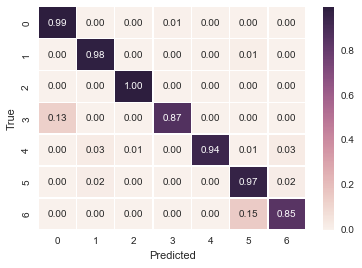

In [160]:
import seaborn as sns
df_results=pd.DataFrame(data=np.column_stack((y_test,y_pred)),columns=['True','Predicted'])
CT_results=pd.crosstab(df_results.True,df_results.Predicted)
CM_results=CT_results/360.0
sns.heatmap(CM_results, annot=True, fmt=".2f", linewidths=.5)

In [161]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_163 (Convolution2D)(None, 32, 48, 10)    320         convolution2d_input_89[0][0]     
____________________________________________________________________________________________________
activation_238 (Activation)      (None, 32, 48, 10)    0           convolution2d_163[0][0]          
____________________________________________________________________________________________________
convolution2d_164 (Convolution2D)(None, 32, 46, 8)     9248        activation_238[0][0]             
____________________________________________________________________________________________________
activation_239 (Activation)      (None, 32, 46, 8)     0           convolution2d_164[0][0]          
___________________________________________________________________________________________

In [387]:
def mnist_cnn_keras(weights_path=None, img_rows=50, img_cols=12):
    batch_size = 128
    nb_classes = 7
    nb_epoch = 32
    # input image dimensions
    # img_rows, img_cols = 50, 12
    # number of convolutional filters to use
    nb_filters = 32
    # size of pooling area for max pooling
    nb_pool = 2
    # convolution kernel size
    kernel_size = (3, 3)
    ###############################################################
    ###############################################################
    model = Sequential()
    model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                            border_mode='valid',
                            input_shape=(1, img_rows, img_cols)))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model


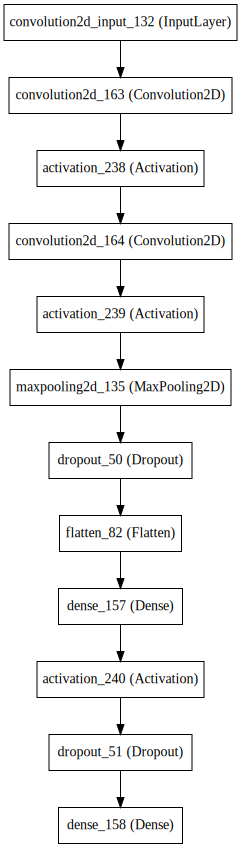

In [395]:
model = load_model('mnist_cnn_keras.h5')
from keras.utils.visualize_util import plot
plot(model, to_file='model_cnn.png',show_layer_names=False,show_shapes=True)
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Tensor decomposition example with random data

In [168]:
Image(filename='prd.png') 
from sktensor import dtensor, cp_als
# Create dense tensor from numpy array
T0 = np.random.rand(3, 50,4 )
T = dtensor(T0)
P, fit, itr, exectimes = cp_als(T,5, init='random')
print(P.U[0].shape)
print(P.U[1].shape)
print(P.U[2].shape)
print(P.lmbda.shape)
T_est=P.totensor()
print(T_est.shape)
print(np.sqrt(((T-T_est)**2).sum()/(T**2).sum())*100.0)
### Option-2
#The quality of the reconstructed signal is measured as the 
# percent-root mean square distortion (PRD):
T1=P.toarray()
prd=np.sqrt(((T0-T1)**2).sum()/(T0**2).sum())*100.0
##
cmpr_ratio=100-100.0*(P.U[0].size+P.U[1].size+P.U[2].size+P.lmbda.size)/T0.size
print(cmpr_ratio)
X=np.array(T1)
X.shape

(3L, 5L)
(50L, 5L)
(4L, 5L)
(5L,)
(3L, 50L, 4L)
30.6222376585
51.6666666667


(3L, 50L, 4L)

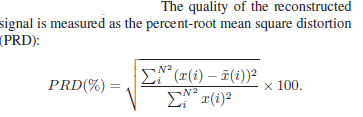

In [169]:
Image(filename='prd.png') 

In [171]:
# Create dense tensor from numpy array
def compress_tensor(T_in, n_cp):
    '''Input is a 3-way numpy.ndarray
    ex: T_in = np.random.rand(3, 50,4 )
    '''
    T = dtensor(T_in)
    P, fit, itr, exectimes = cp_als(T,n_cp, init='random')
    #The quality of the reconstructed signal is measured as the 
    # percent-root mean square distortion (PRD):
    T1=P.toarray()
    prd=np.sqrt(((T_in-T1)**2).sum()/(T_in**2).sum())*100.0
    cmpr_ratio=100-100.0*(P.U[0].size+P.U[1].size+P.U[2].size+P.lmbda.size)/T_in.size
    T_out=np.array(T1)
    return T_out,prd,cmpr_ratio

 ## Visualization of how the deconsructed version looks like:       

In [172]:
X_4Dcuboid=df_12.as_matrix().reshape(12600,50,4,3)
t=0
tensor_t=X_4Dcuboid[t,:,:,:] # Size: (50L, 4L, 3L)
tensor_t.shape

(50L, 4L, 3L)

In [173]:
tensor_t[0,:,:]

array([[  0.17706 , -10.569   ,   1.8251  ],
       [ -7.5051  ,  -4.7736  ,  -0.062476],
       [ -0.36652 ,   1.2706  ,  -0.52412 ],
       [-30.3     ,  31.08    ,   3.96    ]])

In [174]:
T_out,prd,cmpr_ratio=compress_tensor(tensor_t,5)
print(prd)
cmpr_ratio

5.51015129067


51.666666666666664

In [175]:
df_compr=pd.DataFrame(T_out[:,0,:],columns=['ax-c','ay-c','az-c'])
df_compare = pd.concat([df_compr, df_12.ix[0:50,['ax','ay','az']]], axis=1)

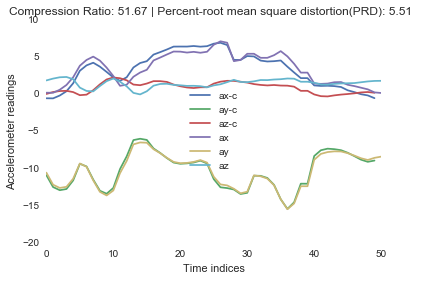

In [176]:
df_compr=pd.DataFrame(T_out[:,0,:],columns=['ax-c','ay-c','az-c'])
df_compare = pd.concat([df_compr, df_12.ix[0:50,['ax','ay','az']]], axis=1)
fig=plt.figure(figsize=(5, 10), dpi=80, facecolor='k', edgecolor='k')
ax=df_compare.plot()
ax.set_xlabel('Time indices')
ax.set_ylabel('Accelerometer readings')
ax.set_title('')
ax.grid(False)
ax.set_title("Compression Ratio: %.2f | Percent-root mean square distortion(PRD): %.2f  " % (cmpr_ratio,prd))
ax.spines['left'].set_color('red')
ax.set_axis_bgcolor('white')
ax.set_axis_on()
plt.savefig('acc_compare.pdf', format='pdf',dpi=100)


# Compress all the data:

### Compression code:

```python

X_4Dcuboid=df_12.as_matrix().reshape(12600,50,4,3)
t=0
tensor_t=X_4Dcuboid[t,:,:,:] # Size: (50L, 4L, 3L)
tensor_t.shape
print(X_4Dcuboid.shape)

n_cp=5
cr_vec=np.zeros((12600,1),dtype='float')
prd_vec=np.zeros((12600,1),dtype='float')
first_time=1
for t_ind in range(12600):
    if first_time:
        first_time=0
        tensor_t=X_4Dcuboid[t_ind,:,:,:]
        T_out,prd,cmpr_ratio=compress_tensor(tensor_t,n_cp)
        df_12_compress=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz']) 
        prd_vec[t_ind]=prd
        cr_vec[t_ind]=cmpr_ratio
        continue
    tensor_t=X_4Dcuboid[t_ind,:,:,:]
    T_out,prd,cmpr_ratio=compress_tensor(tensor_t,5)
    df_12_compress_t=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz'])
    df_12_compress=df_12_compress.append(df_12_compress_t,ignore_index=True)
    prd_vec[t_ind]=prd
    cr_vec[t_ind]=cmpr_ratio
df_12_compress.to_csv('df_12_compress.csv',index=False)
```

In [200]:
X_4Dcuboid=df_12.as_matrix().reshape(12600,50,4,3)
t=0
tensor_t=X_4Dcuboid[t,:,:,:] # Size: (50L, 4L, 3L)
tensor_t.shape
print(X_4Dcuboid.shape)

n_cp=5
cr_vec=np.zeros((12600,1),dtype='float')
prd_vec=np.zeros((12600,1),dtype='float')
first_time=1
for t_ind in range(12600):
    if first_time:
        first_time=0
        tensor_t=X_4Dcuboid[t_ind,:,:,:]
        T_out,prd,cmpr_ratio=compress_tensor(tensor_t,n_cp)
        df_12_compress=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz']) 
        prd_vec[t_ind]=prd
        cr_vec[t_ind]=cmpr_ratio
        continue
    tensor_t=X_4Dcuboid[t_ind,:,:,:]
    T_out,prd,cmpr_ratio=compress_tensor(tensor_t,5)
    df_12_compress_t=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz'])
    df_12_compress=df_12_compress.append(df_12_compress_t,ignore_index=True)
    prd_vec[t_ind]=prd
    cr_vec[t_ind]=cmpr_ratio
df_12_compress.to_csv('df_12_compress.csv',index=False)

(12600L, 50L, 4L, 3L)


mu=4.00381868904, sigma=3.08142048617


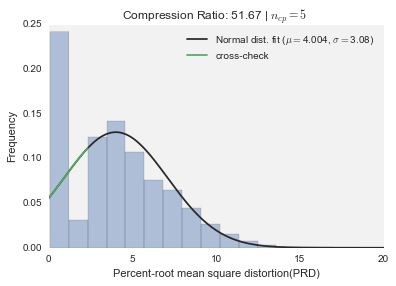

In [270]:
from scipy import stats

ax = sns.distplot(prd_vec, bins=20, kde=False, fit=stats.norm);
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(prd_vec)
print("mu={0}, sigma={1}".format(mu, sigma))

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')

# Cross-check this is indeed the case - should be overlaid over black curve
x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
plt.legend(["Normal dist. fit ($\mu=${0:.3f}, $\sigma=${1:.2f})".format(mu, sigma),
           "cross-check"])
ax.set_xlabel('Percent-root mean square distortion(PRD)')
ax.grid(False)
ax.set_title("Compression Ratio: %.2f | $n_{cp}=5$  " % (cmpr_ratio))
ax.spines['left'].set_color('red')
ax.set_axis_bgcolor('0.95')
ax.set_axis_on()
ax.set_xlim([0,20])
plt.savefig('prd_dist.pdf', format='pdf',dpi=100)

# Using the compressed data

In [201]:
df_12_compress=pd.read_csv('df_12_compress.csv')
# df_36_compress=df_12_compress.ix[:,index_vec]
X_train_test_compress=df_12_compress.as_matrix().reshape(12600, 1, 50,12)
print(X_train_test_compress.shape)

y_train_test_compress=df_data.ix[:,'act_codes'].as_matrix().reshape(12600, 1, 50,1)
print(y_train_test_compress.shape)


N_train=12600.0*0.8 # 80% train and rest test
X_train_compress=X_train_test_compress[0:N_train,:,:,:]
X_test_compress=X_train_test_compress[N_train:,:,:,:]
print(X_train_compress.shape)
print(X_test_compress.shape)

y_train_compress=y_train_test_compress[0:N_train,0,0,0]
print(np.bincount(y_train_compress))

y_test_compress=y_train_test_compress[N_train:,0,0,0]
print(np.bincount(y_test_compress))

nb_classes=7
# convert class vectors to binary class matrices
Y_train_compress= np_utils.to_categorical(y_train_compress, nb_classes)
Y_test_compress= np_utils.to_categorical(y_test_compress, nb_classes)


X_train_compress/=X_train_compress.max()
X_test_compress/=X_test_compress.max()

(12600L, 1L, 50L, 12L)
(12600L, 1L, 50L, 1L)
(10080L, 1L, 50L, 12L)
(2520L, 1L, 50L, 12L)
[1440 1440 1440 1440 1440 1440 1440]
[360 360 360 360 360 360 360]


C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Train on UNcompressed, test on compressed

In [203]:
from keras.models import load_model
model = load_model('mnist_cnn_keras.h5')
score = model.evaluate(X_test_compress, Y_test_compress, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.214300400471
Test accuracy: 0.930555555556


# Train on compressed, test on compressed

```python
    model = mnist_cnn_keras()
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(X_train_compress, Y_train_compress, batch_size=128,validation_split=0.125, nb_epoch=20,verbose=0)
    score = model.evaluate(X_test_compress, Y_test_compress, verbose=0)
    print('Test accuracy:', score[1])
```

In [204]:
model = load_model('cnn_compressed_5.h5')
score = model.evaluate(X_test_compress, Y_test_compress, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.24511984325
Test accuracy: 0.937301587302


# Train on compressed, test on UNcompressed

In [205]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.248652574077
Test accuracy: 0.938095238095


# Now, compress with $n_{cp}$=4

In [300]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print( "Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

In [304]:
X_4Dcuboid=df_12.as_matrix().reshape(12600,50,4,3)
t=0
tensor_t=X_4Dcuboid[t,:,:,:] # Size: (50L, 4L, 3L)
tensor_t.shape
print(X_4Dcuboid.shape)
n_cp=4
cr_vec_4=np.zeros((12600,1),dtype='float')
prd_vec_4=np.zeros((12600,1),dtype='float')
first_time=1
tic()
for t_ind in range(12600):
    if first_time:
        first_time=0
        tensor_t=X_4Dcuboid[t_ind,:,:,:]
        T_out,prd,cmpr_ratio=compress_tensor(tensor_t,n_cp)
        df_12_compress_4=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz']) 
        prd_vec_4[t_ind]=prd
        cr_vec_4[t_ind]=cmpr_ratio
        print(cmpr_ratio)
        continue
    tensor_t=X_4Dcuboid[t_ind,:,:,:]
    T_out,prd,cmpr_ratio=compress_tensor(tensor_t,n_cp)
    df_12_compress_4_t=pd.DataFrame(data=T_out.reshape((50,12)),columns=[u'ax', u'ay', u'az', u'lx', u'ly', u'lz', u'gx', u'gy',  u'gz', u'mx', u'my', u'mz'])
    df_12_compress_4=df_12_compress_4.append(df_12_compress_4_t,ignore_index=True)
    prd_vec_4[t_ind]=prd
    cr_vec_4[t_ind]=cmpr_ratio
toc()
df_12_compress_4.to_csv('df_12_compress_4.csv',index=False)

(12600L, 50L, 4L, 3L)
61.3333333333
Elapsed time is 1093.04100013 seconds.


In [305]:
# df_12_compress_4=pd.read_csv('df_12_compress_4.csv')
X_train_test_compress_4=df_12_compress_4.as_matrix().reshape(12600, 1, 50,12)
y_train_test_compress_4=df_data.ix[:,'act_codes'].as_matrix().reshape(12600, 1, 50,1)
N_train=12600.0*0.8 # 80% train and rest test
X_train_compress_4=X_train_test_compress_4[0:N_train,:,:,:]
X_test_compress_4=X_train_test_compress_4[N_train:,:,:,:]

y_train_compress_4=y_train_test_compress_4[0:N_train,0,0,0]

y_test_compress_4=y_train_test_compress_4[N_train:,0,0,0]

nb_classes=7
# convert class vectors to binary class matrices
Y_train_compress_4= np_utils.to_categorical(y_train_compress_4, nb_classes)
Y_test_compress_4= np_utils.to_categorical(y_test_compress_4, nb_classes)


X_train_compress_4/=X_train_compress_4.max()
X_test_compress_4/=X_test_compress_4.max()

C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\toolkits\anaconda2-4.1.0\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [306]:
# Train: UNcompressed Test: Compressed
from keras.models import load_model
model = load_model('mnist_cnn_keras.h5')
score = model.evaluate(X_test_compress_4, Y_test_compress_4, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.23593307129
Test accuracy: 0.923809523999


# Train: Compressed Test: Compressed
```python
model = mnist_cnn_keras()
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

model.fit(X_train_compress_4, Y_train_compress_4, batch_size=128,validation_split=0.125, nb_epoch=20,verbose=0)
score = model.evaluate(X_test_compress_4, Y_test_compress_4, verbose=0)
print('Test accuracy:', score[1])
model.save('cnn_compressed_4.h5')
```

# Training code:
```python
    model = mnist_cnn_keras()
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model.fit(X_train_compress_4, Y_train_compress_4, batch_size=128,validation_split=0.125, nb_epoch=20,verbose=0)
    score = model.evaluate(X_test_compress_4, Y_test_compress_4, verbose=0)
    print('Test accuracy:', score[1])
```

In [309]:
model = load_model('cnn_compressed_4.h5')
score = model.evaluate(X_test_compress_4, Y_test_compress_4, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.565936353444
Test accuracy: 0.93253968254


In [310]:
model = load_model('cnn_compressed_4.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.532557370008
Test accuracy: 0.933730158541


mu=4.00381868904, sigma=3.08142048617
mu=5.78955319698, sigma=4.37670437008


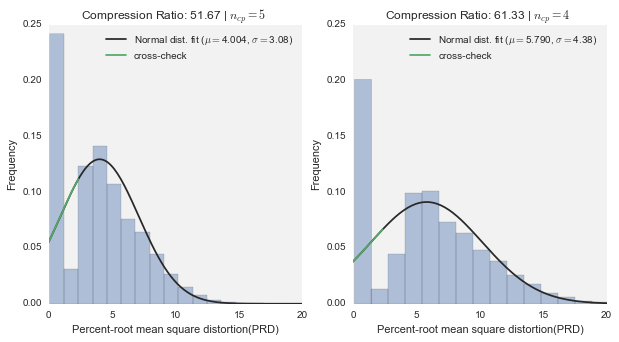

In [319]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.distplot(prd_vec, bins=20, kde=False, fit=stats.norm);
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(prd_vec)
print("mu={0}, sigma={1}".format(mu, sigma))

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')

# Cross-check this is indeed the case - should be overlaid over black curve
x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
plt.legend(["Normal dist. fit ($\mu=${0:.3f}, $\sigma=${1:.2f})".format(mu, sigma),
           "cross-check"])
ax.set_xlabel('Percent-root mean square distortion(PRD)')
ax.grid(False)
ax.set_title("Compression Ratio: 51.67 | $n_{cp}=5$  ")
ax.spines['left'].set_color('red')
ax.set_axis_bgcolor('0.95')
ax.set_axis_on()
ax.set_xlim([0,20])
plt.savefig('prd_dist.pdf', format='pdf',dpi=100)

plt.subplot(1,2,2)
ax = sns.distplot(prd_vec_4, bins=20, kde=False, fit=stats.norm);
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(prd_vec_4)
print("mu={0}, sigma={1}".format(mu, sigma))

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')

# Cross-check this is indeed the case - should be overlaid over black curve
x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
plt.legend(["Normal dist. fit ($\mu=${0:.3f}, $\sigma=${1:.2f})".format(mu, sigma),
           "cross-check"])
ax.set_xlabel('Percent-root mean square distortion(PRD)')
ax.grid(False)
ax.set_title("Compression Ratio: %.2f | $n_{cp}=4$  " % (cmpr_ratio))
ax.spines['left'].set_color('red')
ax.set_axis_bgcolor('0.95')
ax.set_axis_on()
ax.set_xlim([0,20])
plt.savefig('prd_dist.pdf', format='pdf',dpi=100)

2336/2520 [==========================>...] - ETA: 0s0.93253968254


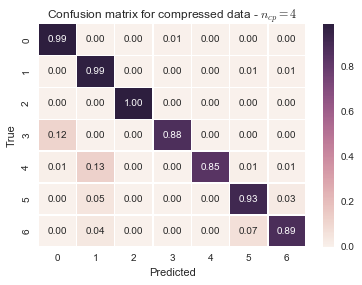

In [324]:
y_pred_compress_4=model.predict_classes(X_test_compress_4)
print((y_pred_compress_4==y_test_compress_4).sum()/float(len(y_test_compress_4)))
df_results_compress_4=pd.DataFrame(data=np.column_stack((y_test_compress_4,y_pred_compress_4)),columns=['True','Predicted'])
CT_results_compress_4=pd.crosstab(df_results_compress_4.True,df_results_compress_4.Predicted)
CM_results_compress_4=CT_results_compress_4/360.0
ax=sns.heatmap(CM_results_compress_4, annot=True, fmt=".2f", linewidths=.5)
ax.set_title('Confusion matrix for compressed data - $n_{cp}=4$')
plt.savefig('cmat_ncp4.pdf', format='pdf',dpi=100)

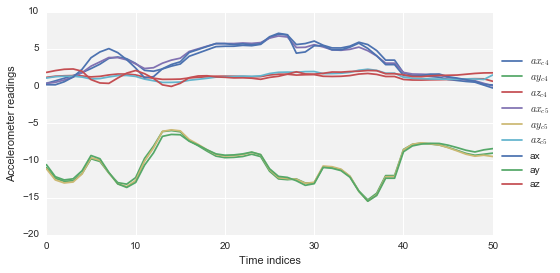

In [378]:
fig=plt.figure(figsize=(8,4), dpi=80)

df_compr5=df_12_compress.ix[0:50,['ax','ay','az']]*df_12.max().max()
df_compr5.columns=['$ax_{c5}$','$ay_{c5}$','$az_{c5}$']

df_compr4=df_12_compress_4.ix[0:50,['ax','ay','az']]*df_12.max().max()
df_compr4.columns=['$ax_{c4}$','$ay_{c4}$','$az_{c4}$']

df_compare = pd.concat([df_compr4,df_compr5,df_12.ix[0:50,['ax','ay','az']]], axis=1)
ax=df_compare.plot(ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Time indices')
plt.ylabel('Accelerometer readings')
ax.grid(True)
#ax.set_title("Compression Ratio: %.2f | Percent-root mean square distortion(PRD): %.2f  " % (cmpr_ratio,prd))
ax.spines['left'].set_color('red')
ax.set_axis_bgcolor('0.95')
ax.set_axis_on()

plt.savefig('acc_compare.pdf', format='pdf',dpi=100)